# Likelihoods with Logistic Regression

## Introduction

In the last lesson we saw how we can represent the hypothesis function of a perceptron as a plot.  As we know, a a perceptron takes in inputs and then, based on these inputs either fires or does not fire, which represent by outputting a value of 1 or 0.

<img src="./neuron-general-2.png" width="50%">

Graphically, we represent the firing or not firing by drawing a line through our data.

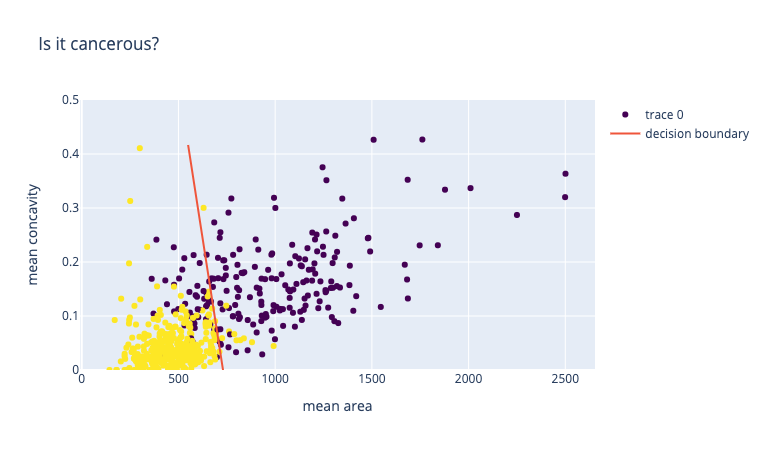

In [35]:
import plotly.graph_objects as go
cancer_json = "https://raw.githubusercontent.com/jigsawlabs-student/neural-nets-from-scratch/master/1-single-neurons/1-neuron-hypothesis-fn/1-hypothesis-fn/cancer_logistic.json"
fig_dict = dict(pd.read_json(cancer_json, typ = 'dict'))
go.Figure(fig_dict)

We call that line our decision boundary, and it represents the boundary between our predictions falling into one category or the other.  And from there, we saw that we can express the confidence in our prediction by having our hypothesis function return the weighted sum.

In [37]:
def perceptron(x_1, x_2):
    weighted_sum = -0.00802333*x_1 +  -3.47361781*x_2 + 5.86
    return weighted_sum

We can see that the smaller the weighted sum, the closer to the decision boundary we are, and thus the lesson confident we are in our prediction.

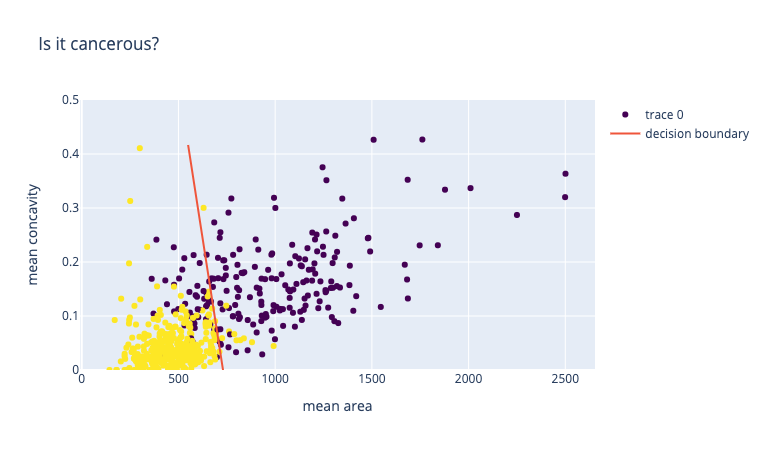

In [36]:
weighted_sums_json = "https://raw.githubusercontent.com/jigsawlabs-student/neural-nets-from-scratch/master/1-single-neurons/1-neuron-hypothesis-fn/1-hypothesis-fn/weighted_sum_cancer.json"
weighted_dict = dict(pd.read_json(weighted_sums_json, typ = 'dict'))
go.Figure(weighted_dict)

## From confidence to probabilities

Our perceptron is now updated to return both a prediction and a degree of confidence.  It returns: 
* a large negative value when confident there is no cancer, 
* a large positive value when confident there is cancer
* And zero when it is unsure 

But it would be even better if it could indicate it's confidence in turns of probabilities.  Then, our perceptron would return: 
* A number close to 0, when there is no cancer
* A number close to 1 when confident there is cancer
* And .5 when unsure

This now expresses confidence in a way that we can understand and use: as a likelihood that something will or will not occur.

All we need to do now, is find a way to translate our large negative values to a number close to zero, the large positive values to a number close to 1, and a return value of 0 to the value .5.

As it turns out, we have just the thing. 

### Introducing the sigmoid function

Just to recap our goals are to have a function that does the following: 

* returns `.5` when $x = 0$ 
* transforms large negative values to a value close to zero 
* transforms large positive values to a value close to one

As it turns out the sigmoid function accomplishes all of these goals.  Let's see it.

The sigmoid function is the function $S$ defined as: 

$$ S(z) = \frac{1}{1 + e^{-z}} = \frac{e^z}{e^z + 1}$$ 

> Above $z$ is the score that is returned from the perceptron -- that is, the weighted sum.

Now let's plug in some values for $z$ to see how our sigmoid function meets our three goals from above.

1. When $z = 0$ we get:

$$ S(0) = \frac{1}{1 + e^{-0}} = \frac{e^0}{e^0 + 1} = \frac{1}{1 + 1} = \frac{1}{2}$$ 

2. When $z = -100$ (a somewhat large negative number) we get:

$$ S(-100) = \frac{1}{1 + e^{- (-100)}} = \frac{1}{1 + e^{100}} \approx \frac{1}{1 + \infty} \approx \frac{1}{\infty} \approx 0 $$ 

2. When $z = 100$ (a somewhat large positive number) we get:

$$ S(-100) = \frac{1}{1 + e^{-100}} = \frac{1}{1 + \frac{1}{e^{100}}} = \frac{1}{1 + 0} \approx 1 $$ 

So we can see our sigmoid function works well for us.

So now by passing our weighted sum into the sigmoid function, we return a probability close to one.  Let's plot our graph of breast cancer data again, this time with the probabilities represented.

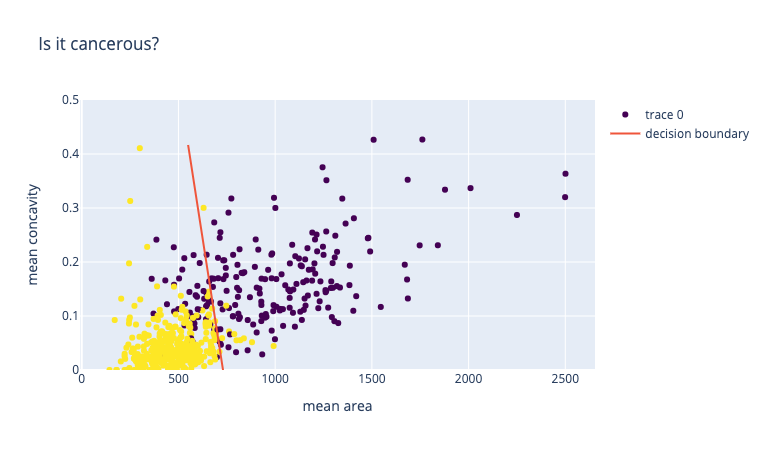

In [41]:
probs_json = "https://raw.githubusercontent.com/jigsawlabs-student/neural-nets-from-scratch/master/1-single-neurons/1-neuron-hypothesis-fn/1-hypothesis-fn/cancerous_probs.json"
weighted_dict = dict(pd.read_json(probs_json, typ = 'dict'))
go.Figure(weighted_dict)

So now we can see that with values close to the line, 

### Plotting the Sigmoid Function

To plot the sigmoid function, let's first translate it into a function.

In [170]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

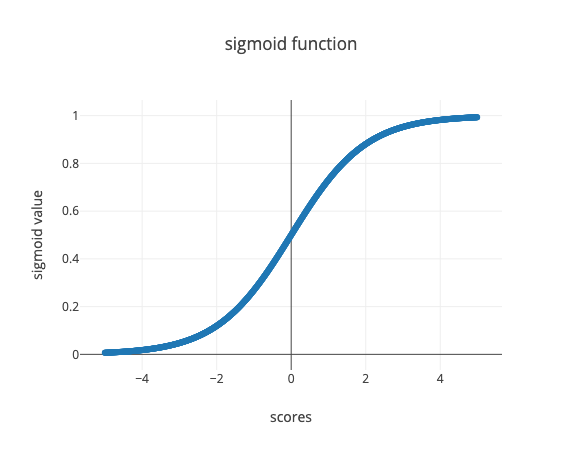

In [171]:
from graph import trace_values, plot
x_values = [scaled_x/100 for scaled_x in list(range(-500, 500))]
y_values = [sigmoid(x) for x in x_values]

sigmoid_trace = trace_values(x_values, y_values)
plot([sigmoid_trace], {'title': 'sigmoid function', 'xaxis': {'title': 'scores'}, 'yaxis': {'title': 'sigmoid value'}})

So this is the famous sigmoid function.  And it follows the rules that we established above.  It approaches zero as $x$ becomes more negative, and approaches one as $x$ becomes more positive.  And it returns .5 when crossing x-axis. 

### From decision boundary plot to sigmoid plot

Ok, let's go back to our original problem of identifying cancer cells.  Remember that our goal is to find a decision function that differentiates between benign and cancerous cell.  This is our plot.

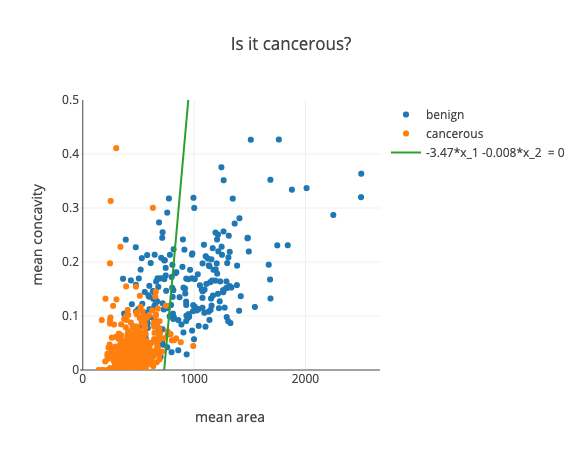

In [172]:
decision_trace = trace_values(x_values=area_values, y_values=boundaries, mode = 'lines', name = '-3.47*x_1 -0.008*x_2  = 0')

layout = {'xaxis': {'title': 'mean area'}, 'yaxis': {'title': 'mean concavity', 'range': [0, .5]}, 'title': 'Is it cancerous?'}
plot([non_cancerous_trace, cancerous_trace,  decision_trace], layout = layout)

Now, we can get a sense of how confident we are in each of our points.

So we already saw how we can predict each of our datapoints.  We simply take the features and pass them through our decision function.

In [178]:
scoped_df.set_copy = False
prediction_scores = scoped_df.loc[:, ['mean_area', 'mean_concavity']].apply(lambda x: decision_boundary_function(*x), axis=1)
scoped_df.loc[:, 'prediction_scores'] = prediction_scores

And then we can convert our scores into prediction probabilities using our `sigmoid` function.

In [179]:
prediction_probs = scoped_df.loc[:, 'prediction_scores'].apply(lambda x: sigmoid(x))
scoped_df.loc[:, 'prediction_probs'] = prediction_probs
scoped_df[:3]

,mean_area,mean_concavity,y,prediction_scores,prediction_probs
0,1001.0,0.3001,0,-3.207790,0.038874
1,1326.0,0.0869,0,-5.074797,0.006214
2,1203.0,0.1974,0,-4.471762,0.011298


Now we can see how our scores translate to prediction probabilities.

In [180]:
df_benign, df_cancerous = [x for _, x in scoped_df.groupby(scoped_df['y'] == 1)]

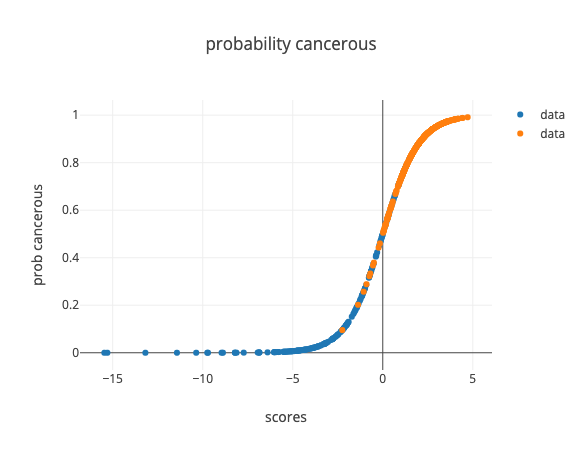

In [181]:
benign_sigmoid_trace = trace_values(df_benign['prediction_scores'], df_benign['prediction_probs'])
cancerous_sigmoid_trace = trace_values(df_cancerous['prediction_scores'], df_cancerous['prediction_probs'])
plot([benign_sigmoid_trace, cancerous_sigmoid_trace], layout = {'xaxis': {'title': 'scores'}, 'yaxis': {'title': 'prob cancerous'}, 'title': 'probability cancerous'})

So we can see our classifier is assigning a higher likelihood of the cancerous cells in fact being cancerous.

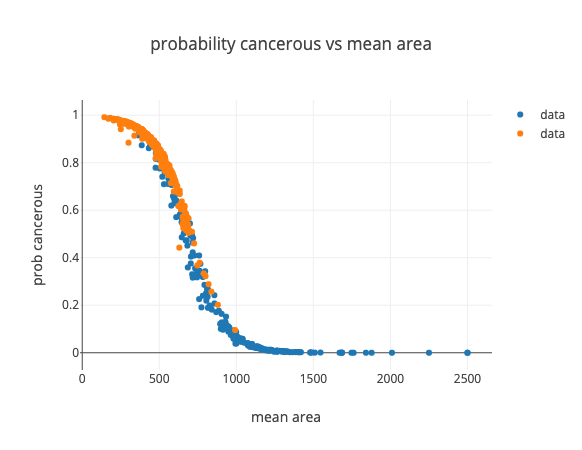

In [182]:
benign_sigmoid_trace = trace_values(df_benign['mean_area'], df_benign['prediction_probs'])
cancerous_sigmoid_trace = trace_values(df_cancerous['mean_area'], df_cancerous['prediction_probs'])
plot([benign_sigmoid_trace, cancerous_sigmoid_trace], layout = {'xaxis': {'title': 'mean area'}, 'yaxis': {'title': 'prob cancerous'}, 'title': 'probability cancerous vs mean area'})

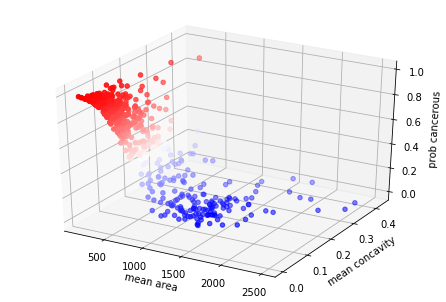

In [184]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
fig = plt.figure()

ax = Axes3D(fig) 

zdata = scoped_df['prediction_probs']
xdata = scoped_df['mean_area']
ydata = scoped_df['mean_concavity']

ax.set_xlabel('mean area', rotation=150)
ax.set_ylabel('mean concavity')
ax.set_zlabel('prob cancerous', rotation=60)

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='bwr');
ax.clabel(fontsize=9, inline=1)
plt.show()

And to convert these into scores...also do in iframe

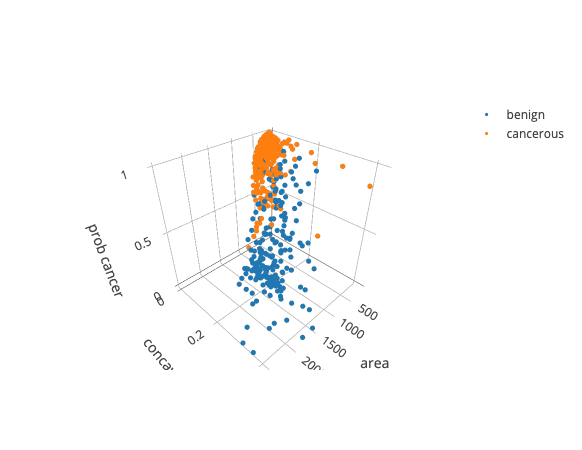

In [213]:
trace_three_d_benign = dict(
        name = 'benign', x = df_benign['mean_area'], y = df_benign['mean_concavity'], z = df_benign['prediction_probs'],
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, line=dict(width=0) ) )

trace_three_d_cancerous = dict(
        name = 'cancerous', x = df_cancerous['mean_area'], y = df_cancerous['mean_concavity'], z = df_cancerous['prediction_probs'],
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, line=dict(width=0) ) )
plot([trace_three_d_benign, trace_three_d_cancerous], {'scene': {'xaxis': {'title': 'area'}, 'yaxis': {'title': 'concavity'}, 'zaxis': {'title': 'prob cancer'}}})

In [ ]:
decision_trace = trace_values(x_values=area_values, y_values=boundaries, mode = 'lines', name = '-3.47*x_1 -0.008*x_2  = 0')

layout = {'xaxis': {'title': 'mean area'}, 'yaxis': {'title': 'mean concavity', 'range': [0, .5]}, 'title': 'Is it cancerous?'}
plot([non_cancerous_trace, cancerous_trace,  decision_trace], layout = layout)

So from here, we can see our ability to take different attributes, output a score with our decision function, and then use our sigmoid function to translate these into a probability of being cancerous.

And once again, we can use sklearn to do this for us.

In [264]:
X = scoped_df[['mean_area', 'mean_concavity']][:-1]
model.predict_proba(X)[:10, 0]

array([0.96112647, 0.99378651, 0.98870198, 0.12678865, 0.9946646 ,
       0.18393264, 0.94633048, 0.28823469, 0.25927843, 0.22129445])

### Summary

### Resources

[logistic regression cost](https://www.internalpointers.com/post/cost-function-logistic-regression)

* Talk about the score and the logistic function combined, 
* And the effects of increasing or decreasing the slope, or adding a constant to the score.